All members contributed equally.

# Clustering

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading in data
import pandas as pd
import numpy as np
import os

# Establishing folder path and empty data frame
folder = "asl-csv-data/book-drink-csv"
combined = pd.DataFrame()

# iterating through files and combining data into one pandas frame
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    df = pd.read_csv(file_path)
    # adding sign column as ID
    df['ID'] = filename 
    # combining data frames together
    combined = pd.concat([combined, df]) 
    
# adding ID
cols = ['ID'] + [col for col in combined.columns if col != 'ID']
combined = combined[cols]
combined = combined.iloc[:,:77] # not including below the waist ifnormation
combined.head() 

,ID,frame_number,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,...,left_thumb_z,right_thumb_x,right_thumb_y,right_thumb_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z
0,0018695357180107397-DRINK 2.csv,0,0.525554,0.289397,-0.582463,0.548919,0.232308,-0.532373,0.562274,0.232486,...,-0.206225,0.247369,1.558319,-0.511895,0.632642,1.468299,0.010406,0.398762,1.476173,-0.007090
1,0018695357180107397-DRINK 2.csv,1,0.535128,0.260470,-0.581579,0.556137,0.200653,-0.537230,0.570259,0.203041,...,-0.347507,0.288129,1.508925,-0.537757,0.643821,1.453811,-0.005935,0.422051,1.465328,0.009119
2,0018695357180107397-DRINK 2.csv,2,0.539804,0.258574,-0.632365,0.562304,0.199046,-0.590813,0.574522,0.200578,...,-0.406069,0.274099,1.477691,-0.609302,0.641027,1.472204,-0.005464,0.416517,1.477130,0.008940
3,0018695357180107397-DRINK 2.csv,3,0.537268,0.257150,-0.608182,0.558576,0.200909,-0.566078,0.571905,0.201947,...,-0.410491,0.281217,1.543460,-0.559211,0.632977,1.483827,-0.008083,0.407901,1.485082,0.011341
4,0018695357180107397-DRINK 2.csv,4,0.537328,0.259728,-0.714443,0.558180,0.204066,-0.661015,0.571754,0.204858,...,-0.420472,0.274881,1.513437,-0.781673,0.636226,1.497416,-0.009797,0.411186,1.496125,0.013032


In [3]:
# Normalizing data
id_series = combined['ID']
frame_number_series = combined['frame_number']
combined_dropped = combined.drop(['ID', 'frame_number'], axis=1)
normalized = (combined_dropped - combined_dropped.mean()) / combined_dropped.std()
normalized['ID'] = id_series
normalized['frame_number'] = frame_number_series
cols = ['ID', 'frame_number'] + [col for col in normalized.columns if col not in ['ID', 'frame_number']]
normalized = normalized[cols]
normalized.head()

,ID,frame_number,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,...,left_thumb_z,right_thumb_x,right_thumb_y,right_thumb_z,left_hip_x,left_hip_y,left_hip_z,right_hip_x,right_hip_y,right_hip_z
0,0018695357180107397-DRINK 2.csv,0,-0.216466,-0.855473,1.351659,-0.264594,-0.843323,1.337476,-0.336690,-0.848154,...,1.243787,-0.320977,1.195948,1.408483,-0.894719,0.653317,1.016693,0.339605,0.732143,-1.029912
1,0018695357180107397-DRINK 2.csv,1,0.014752,-1.397620,1.354661,-0.092402,-1.427792,1.320892,-0.145114,-1.392753,...,0.928346,-0.045281,1.074682,1.351138,-0.599951,0.535466,0.640497,0.898149,0.644621,-0.660074
2,0018695357180107397-DRINK 2.csv,2,0.127700,-1.433150,1.182086,0.054744,-1.457452,1.137906,-0.042835,-1.438312,...,0.797595,-0.140177,0.998002,1.192498,-0.673631,0.685083,0.651345,0.765433,0.739864,-0.664163
3,0018695357180107397-DRINK 2.csv,3,0.066434,-1.459838,1.264262,-0.034210,-1.423068,1.222374,-0.105619,-1.412975,...,0.787722,-0.092028,1.159468,1.303566,-0.885885,0.779627,0.591060,0.558790,0.804034,-0.609383
4,0018695357180107397-DRINK 2.csv,4,0.067891,-1.411527,0.903173,-0.043650,-1.364773,0.898168,-0.109262,-1.359144,...,0.765437,-0.134885,1.085761,0.810294,-0.800232,0.890159,0.551605,0.637567,0.893148,-0.570813


In [4]:
import numpy as np
import pandas as pd

# Function to get the curvature of body parts
def get_curvature(df, x_part, y_part, z_part, dt):
    # find velocity components - 1st derivates
    dx = df[x_part].diff() / dt
    dy = df[y_part].diff() / dt
    dz = df[z_part].diff() / dt

    # find accelteration components - 2nd derivatives
    ddx = dx.diff() / dt
    ddy = dy.diff() / dt
    ddz = dz.diff() / dt

    # find magnitude with cross product of velocity and acceleration
    num = np.sqrt((dy * ddz - dz * ddy)**2 + (dz * ddx - dx * ddz)**2 + (dx * ddy - dy * ddx)**2)

    # find denominator -cube of the magnitude of the velocity
    den = (dx**2 + dy**2 + dz**2)**1.5

    # avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        curvature = num / den
        curvature = curvature.replace([np.inf, -np.inf, np.nan], 0)

    return curvature

In [5]:
# Function to get the angle between the x,y,z body parts
def get_angle(pt1, pt2, pt3):
    vector1 = np.array(pt2) - np.array(pt1) # finding differences
    vector2 = np.array(pt2) - np.array(pt3)
    unit_vector1 = vector1 / np.linalg.norm(vector1)
    unit_vector2 = vector2 / np.linalg.norm(vector2)
    dot_product = np.dot(unit_vector1, unit_vector2) # calculating the dot product of the vectors
    angle = np.arccos(np.clip(dot_product, -1.0, 1.0))
    return np.degrees(angle)

In [6]:
# Feature Engineering, for each frame we calculate certain features
def derive_features(combined):
    # establising lists
    x_body_parts = ['nose_x', 'left_eye_inner_x', 'left_eye_x', 'left_eye_outer_x', 'right_eye_inner_x', 'right_eye_x', 'right_eye_outer_x',
                   'left_ear_x', 'right_ear_x', 'mouth_left_x', 'mouth_right_x', 'left_shoulder_x', 'right_shoulder_x', 'left_elbow_x',
                   'right_elbow_x', 'left_wrist_x', 'right_wrist_x', 'left_pinky_x', 'right_pinky_x', 'left_index_x', 'right_index_x',
                    'left_thumb_x', 'right_thumb_x', 'left_hip_x', 'right_hip_x']
    y_body_parts = ['nose_y', 'left_eye_inner_y', 'left_eye_y', 'left_eye_outer_y', 'right_eye_inner_y', 'right_eye_y', 'right_eye_outer_y',
                   'left_ear_y', 'right_ear_y', 'mouth_left_y', 'mouth_right_y', 'left_shoulder_y', 'right_shoulder_y', 'left_elbow_y',
                   'right_elbow_y', 'left_wrist_y', 'right_wrist_y', 'left_pinky_y', 'right_pinky_y', 'left_index_y', 'right_index_y',
                    'left_thumb_y', 'right_thumb_y', 'left_hip_y', 'right_hip_y']
    z_body_parts = ['nose_z', 'left_eye_inner_z', 'left_eye_z', 'left_eye_outer_z', 'right_eye_inner_z', 'right_eye_z', 'right_eye_outer_z',
                   'left_ear_z', 'right_ear_z', 'mouth_left_z', 'mouth_right_z', 'left_shoulder_z', 'right_shoulder_z', 'left_elbow_z',
                   'right_elbow_z', 'left_wrist_z', 'right_wrist_z', 'left_pinky_z', 'right_pinky_z', 'left_index_z', 'right_index_z',
                    'left_thumb_z', 'right_thumb_z', 'left_hip_z', 'right_hip_z']
    print(len(x_body_parts))

    body_part_stats = {}

    # calculating body stats for each body postion
    for part in x_body_parts + y_body_parts + z_body_parts:
        body_part_stats[part] = {
            'mean': combined[part].mean(), 
            'std': combined[part].std(),
            'max': combined[part].max(),
            'min': combined[part].min()
        }


    # calculating body_movements for x, y, z
    velocity = {axis: {} for axis in ['x', 'y', 'z']}
    acceleration = {axis: {} for axis in ['x', 'y', 'z']}
    jerk = {axis: {} for axis in ['x', 'y', 'z']}
    total_displacement = {axis: {} for axis in ['x', 'y', 'z']}
    average_speed = {axis: {} for axis in ['x', 'y', 'z']}
    average_acceleration = {axis: {} for axis in ['x', 'y', 'z']}

    dt = 1  # assuming the frame rate is 1

    # process for x, y, and z body parts
    for axis, parts in [('x', x_body_parts), ('y', y_body_parts), ('z', z_body_parts)]:
        for part in parts:
            # calculate velocity
            velocity[axis][part] = combined[part].diff() / dt

            # calculate aceleration
            acceleration[axis][part] = velocity[axis][part].diff() / dt

            # calculate jerk
            jerk[axis][part] = acceleration[axis][part].diff() / dt

            # calculate total displacement from first to last frame
            total_displacement[axis][part] = np.sqrt((combined[part].iloc[-1] - combined[part].iloc[0])**2)

            # calculate average speed
            average_speed[axis][part] = np.mean(np.abs(velocity[axis][part]))

            # calculate average acceleration
            average_acceleration[axis][part] = np.mean(np.abs(acceleration[axis][part]))

    # distance between body parts and critical point (nose)
    distance_from_nose = {}
    base_body_parts = set(part.rsplit('_', 1)[0] for part in x_body_parts) # removing coords to get base name of body part

    # calculate the Euclidean distance from nose to each body part
    for base_part in base_body_parts:
        if 'nose' not in base_part:  # don't calculate nose from itself
            distance_from_nose[base_part] = np.sqrt(
                (combined[f'{base_part}_x'] - combined['nose_x'])**2 +
                (combined[f'{base_part}_y'] - combined['nose_y'])**2 +
                (combined[f'{base_part}_z'] - combined['nose_z'])**2
            )

    # Curvature
    curvature = {axis: {} for axis in ['x', 'y', 'z']}  

    # Calculating curvature for each body part
    for axis, parts in [('x', x_body_parts), ('y', y_body_parts), ('z', z_body_parts)]:
        for part_x, part_y, part_z in zip(x_body_parts, y_body_parts, z_body_parts):
            base_part_name = part_x.rsplit('_', 1)[0] 
            # Calculate curvature using associated x, y, z coords
            curvature[base_part_name] = get_curvature(combined, part_x, part_y, part_z, dt)
            
    # Angle calculation
    angles = {}

    # Calculate angles for wrists
    for part in ['left_wrist', 'right_wrist']:
        elbow = part.replace('wrist', 'elbow')
        hand = part.replace('wrist', 'pinky')  

        # Calculate wrist angles using elbow, wrist, and pinky
        combined[f'{part}_angle'] = combined.apply(lambda row: get_angle(
            [row[f'{elbow}_x'], row[f'{elbow}_y'], row[f'{elbow}_z']],
            [row[f'{part}_x'], row[f'{part}_y'], row[f'{part}_z']],
            [row[f'{hand}_x'], row[f'{hand}_y'], row[f'{hand}_z']]
        ), axis=1)

    # Calculate neck angles
    shoulder_left = 'left_shoulder'
    shoulder_right = 'right_shoulder'
    nose = 'nose'

    combined['neck_angle'] = combined.apply(lambda row: get_angle(
        [row[f'{shoulder_left}_x'], row[f'{shoulder_left}_y'], row[f'{shoulder_left}_z']],
        [row[f'{nose}_x'], row[f'{nose}_y'], row[f'{nose}_z']],
        [row[f'{shoulder_right}_x'], row[f'{shoulder_right}_y'], row[f'{shoulder_right}_z']]
    ), axis=1)
    
    
    # Finger Distances
    fingers = ['thumb', 'index', 'pinky']

    # dictionary to hold the distances
    finger_distances = {}

    for hand_prefix in ['left', 'right']:
        for i in range(len(fingers)):
            for j in range(i + 1, len(fingers)):
                finger1 = f"{hand_prefix}_{fingers[i]}"
                finger2 = f"{hand_prefix}_{fingers[j]}"

                # Calculate distances and store in a DataFrame or dictionary
                distance_key = f"{finger1}_to_{finger2}_distance"
                combined[distance_key] = np.sqrt(
                    (combined[f"{finger1}_x"] - combined[f"{finger2}_x"])**2 +
                    (combined[f"{finger1}_y"] - combined[f"{finger2}_y"])**2 +
                    (combined[f"{finger1}_z"] - combined[f"{finger2}_z"])**2
                )

    # adding features to combined dataset
    for axis in ['x', 'y', 'z']:
        for part in combined.columns:
            if part.endswith(axis): 
                base_part_name = part.rsplit('_', 1)[0]

                # Add velocity, acceleration, jerk
                combined[f'velocity_{part}'] = velocity[axis][part]
                combined[f'acceleration_{part}'] = acceleration[axis][part]
                combined[f'jerk_{part}'] = jerk[axis][part]

                # Add total displacement, average speed, average acceleration
                combined[f'total_displacement_{part}'] = total_displacement[axis][part]
                combined[f'average_speed_{part}'] = average_speed[axis][part]
                combined[f'average_acceleration_{part}'] = average_acceleration[axis][part]

    # Add curvature for each body part
    for base_part_name, curv_values in curvature.items():
        combined[f'curvature_{base_part_name}'] = curv_values
    
    # Getting anlge for body parts
    for angle_name, angle_values in angles.items():
        combined[angle_name] = angle_values

    # Add distance from nose for each body part
    for base_part_name, distance_values in distance_from_nose.items():
        combined[f'distance_from_nose_to_{base_part_name}'] = distance_values

    features = combined
    return features

In [7]:
# Getting features from set
features = derive_features(normalized)
features.head()

25


,ID,frame_number,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,...,distance_from_nose_to_left_eye_inner,distance_from_nose_to_left_index,distance_from_nose_to_right_index,distance_from_nose_to_mouth_left,distance_from_nose_to_right_shoulder,distance_from_nose_to_right_hip,distance_from_nose_to_left_shoulder,distance_from_nose_to_left_thumb,distance_from_nose_to_left_pinky,distance_from_nose_to_left_elbow
0,0018695357180107397-DRINK 2.csv,0,-0.216466,-0.855473,1.351659,-0.264594,-0.843323,1.337476,-0.336690,-0.848154,...,0.051625,1.757043,2.046784,0.183650,1.011503,2.915753,0.894902,1.770994,1.721268,0.899128
1,0018695357180107397-DRINK 2.csv,1,0.014752,-1.397620,1.354661,-0.092402,-1.427792,1.320892,-0.145114,-1.392753,...,0.116330,2.171757,2.463349,0.330069,1.808138,3.001716,1.812124,2.181228,2.155674,1.876648
2,0018695357180107397-DRINK 2.csv,2,0.127700,-1.433150,1.182086,0.054744,-1.457452,1.137906,-0.042835,-1.438312,...,0.088685,2.400096,2.439278,0.296083,1.800574,2.921871,1.970208,2.404964,2.384382,2.119602
3,0018695357180107397-DRINK 2.csv,3,0.066434,-1.459838,1.264262,-0.034210,-1.423068,1.222374,-0.105619,-1.412975,...,0.115047,2.407621,2.613942,0.278543,1.787224,2.979610,2.043944,2.424921,2.375374,2.083462
4,0018695357180107397-DRINK 2.csv,4,0.067891,-1.411527,0.903173,-0.043650,-1.364773,0.898168,-0.109262,-1.359144,...,0.121046,2.449613,2.495116,0.251814,1.582064,2.794403,1.853849,2.450673,2.417990,2.053385


In [8]:
# Function that will normlaize new features
def normalize_features(features):
    # droping empty columns
    unlabeled_features = features.drop(['curvature_x', 'curvature_y', 'curvature_z'], axis=1)

    # drop first three frames of each video (to get rid of NaNs)
    unlabeled_features = unlabeled_features[~unlabeled_features['frame_number'].isin([0, 1, 2])]

    # storing and removing id from frame
    ids = unlabeled_features['ID']
    unlabeled_features.drop('ID', axis=1, inplace=True)

    # making frame the index
    unlabeled_features.set_index('frame_number', inplace=True)

    # convert data to numerical vales
    for col in unlabeled_features.columns:
        unlabeled_features[col] = pd.to_numeric(unlabeled_features[col], errors='coerce')

    # Drop any columns where conversion to numeric introduced NaNs
    #unlabeled_features.dropna(axis=1, inplace=True)
    unlabeled_features.fillna(method='bfill', inplace=True) 

    # Perform normalization
    #unlabeled_features = (unlabeled_features - unlabeled_features.mean()) / unlabeled_features.std()

    # add ID back
    unlabeled_features['ID'] = ids.values  
    return unlabeled_features

In [9]:
# Normalizing features and formatting
labeled_features = normalize_features(features)
labels = labeled_features['ID']
unlabeled = labeled_features.iloc[:, :-1]  # Excluding ID column from features
unlabeled.head()

,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,left_eye_z,left_eye_outer_x,...,distance_from_nose_to_left_eye_inner,distance_from_nose_to_left_index,distance_from_nose_to_right_index,distance_from_nose_to_mouth_left,distance_from_nose_to_right_shoulder,distance_from_nose_to_right_hip,distance_from_nose_to_left_shoulder,distance_from_nose_to_left_thumb,distance_from_nose_to_left_pinky,distance_from_nose_to_left_elbow
frame_number,,,,,,,,,,,,,,,,,,,,,
3,0.066434,-1.459838,1.264262,-0.034210,-1.423068,1.222374,-0.105619,-1.412975,1.222884,-0.180762,...,0.115047,2.407621,2.613942,0.278543,1.787224,2.979610,2.043944,2.424921,2.375374,2.083462
4,0.067891,-1.411527,0.903173,-0.043650,-1.364773,0.898168,-0.109262,-1.359144,0.898213,-0.173314,...,0.121046,2.449613,2.495116,0.251814,1.582064,2.794403,1.853849,2.450673,2.417990,2.053385
5,0.128079,-1.380727,1.212462,0.009806,-1.346702,1.179347,-0.060295,-1.340492,1.179487,-0.114305,...,0.127447,2.323883,2.498067,0.274669,1.662555,3.008555,1.901764,2.335008,2.303390,2.008906
6,0.135230,-1.362611,1.275705,0.024081,-1.336257,1.243627,-0.050936,-1.328092,1.243820,-0.094009,...,0.118650,2.303228,2.501313,0.266078,1.702062,3.183320,1.819669,2.319326,2.273256,1.964515
7,0.155905,-1.353458,1.281220,0.046145,-1.331821,1.245539,-0.031338,-1.323271,1.245801,-0.074298,...,0.117425,2.324236,2.542291,0.268379,1.714139,3.260882,1.843188,2.339621,2.294383,2.007932


In [10]:
# Selecting features
#unlabeled_features = unlabeled.iloc[:, 75:] 
unlabeled_features = unlabeled
unlabeled.head()

,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,left_eye_z,left_eye_outer_x,...,distance_from_nose_to_left_eye_inner,distance_from_nose_to_left_index,distance_from_nose_to_right_index,distance_from_nose_to_mouth_left,distance_from_nose_to_right_shoulder,distance_from_nose_to_right_hip,distance_from_nose_to_left_shoulder,distance_from_nose_to_left_thumb,distance_from_nose_to_left_pinky,distance_from_nose_to_left_elbow
frame_number,,,,,,,,,,,,,,,,,,,,,
3,0.066434,-1.459838,1.264262,-0.034210,-1.423068,1.222374,-0.105619,-1.412975,1.222884,-0.180762,...,0.115047,2.407621,2.613942,0.278543,1.787224,2.979610,2.043944,2.424921,2.375374,2.083462
4,0.067891,-1.411527,0.903173,-0.043650,-1.364773,0.898168,-0.109262,-1.359144,0.898213,-0.173314,...,0.121046,2.449613,2.495116,0.251814,1.582064,2.794403,1.853849,2.450673,2.417990,2.053385
5,0.128079,-1.380727,1.212462,0.009806,-1.346702,1.179347,-0.060295,-1.340492,1.179487,-0.114305,...,0.127447,2.323883,2.498067,0.274669,1.662555,3.008555,1.901764,2.335008,2.303390,2.008906
6,0.135230,-1.362611,1.275705,0.024081,-1.336257,1.243627,-0.050936,-1.328092,1.243820,-0.094009,...,0.118650,2.303228,2.501313,0.266078,1.702062,3.183320,1.819669,2.319326,2.273256,1.964515
7,0.155905,-1.353458,1.281220,0.046145,-1.331821,1.245539,-0.031338,-1.323271,1.245801,-0.074298,...,0.117425,2.324236,2.542291,0.268379,1.714139,3.260882,1.843188,2.339621,2.294383,2.007932


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import joblib

# Function to choose best params and train model
def cluster_data(data, max_clusters, visualize="no"):
    # Normalize data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    data_scaled = normalize(data_scaled)
    
    # Testing different numbers of clusters
    silhouette_scores = []
    for n_clusters in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        # Training the model and Storing the predicted cluster labels
        labels = kmeans.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, labels)
        silhouette_scores.append(score)
        print(f"Silhouette Score for {n_clusters} clusters: {score}")
    
    # Plotting silhouette scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.show()

    # Select the number of clusters with the highest silhouette score
    best_n_clusters = np.argmax(silhouette_scores) + 2  # +2 because range starts at 2
    print(f"Best number of clusters: {best_n_clusters}")
    
    # Re-run KMeans with the best number of clusters
    best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
    best_labels = best_kmeans.fit_predict(data_scaled)
    
    # Option to visualize details
    if visualize=="yes":
        # Dimensionality reduction for visualization
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(data_scaled)

        # Plotting the clusters
        plt.figure(figsize=(10, 5))
        plt.scatter(data_pca[:, 0], data_pca[:, 1], c=best_labels, cmap='viridis', marker='o', alpha=0.5)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster Label')
        plt.title('Cluster Visualization After PCA Reduction')
        plt.show()

        # Save the trained model
        joblib.dump(best_kmeans, 'kmeans_model.pkl')
        print("Model saved as 'kmeans_model.pkl'")

        return best_kmeans, best_labels

Silhouette Score for 2 clusters: 0.06381599318461925
Silhouette Score for 3 clusters: 0.06476300160249837


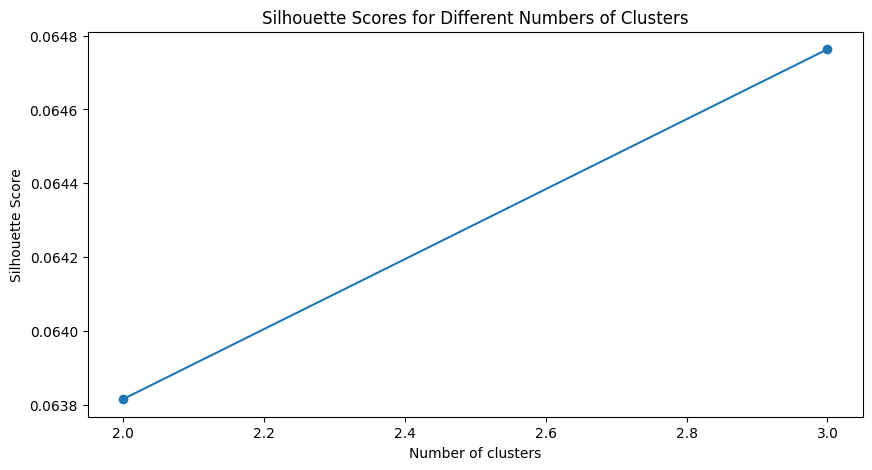

Best number of clusters: 3


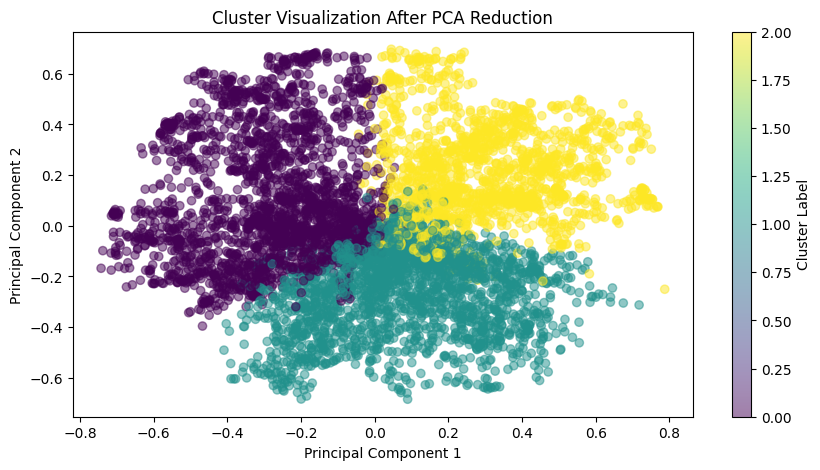

Model saved as 'kmeans_model.pkl'


(KMeans(n_clusters=3, random_state=42), array([0, 0, 0, ..., 2, 2, 2]))

In [12]:
# Train model and cluster data
cluster_data(unlabeled_features, 3, "yes")

In [17]:
# Function to cluster data with kmeans
def predict_sign(filepath, saved_model='kmeans_model.pkl'):
    # Load the data
    df = pd.read_csv(filepath)
    df = df.iloc[:,:76]
    df = derive_features(df)
    #df = df.iloc[:, 76:] 
    df = df[~df['frame_number'].isin([0, 1, 2])]
    df = df.drop('frame_number', axis=1) # remove frame number
    
    df = df.drop(['curvature_x', 'curvature_y', 'curvature_z'], axis=1)
    

    # Convert all data to numeric to prevent TypeError during normalization
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # fill NaNs with previous values
    #df.dropna(axis=1, inplace=True)
    #df.fillna(method='bfill', inplace=True)
    #df.fillna(method='ffill', inplace=True)
    df.fillna(df.mean(), inplace=True)
    
    df = normalize(df)
    
    #df = df.drop(['frame_number'], axis=1)
    #df = (df - df.mean()) / df.std()  # Standardizing
    
    #loading the saved model
    model = joblib.load(saved_model)
    
    # making a prediction
    predicted_label = model.predict(df)
    
    # returning a list of all predictions for each frame
    return predicted_label

In [14]:
def most_common_label(predicted_labels):
    # count each label
    label_counts = Counter(predicted_labels)
    
    # find the most common label and its count
    most_common, count = label_counts.most_common(1)[0]
    
    # calculate the percentage of the most common label
    total = len(predicted_labels)
    percentage = (count / total) * 100
    
    return most_common, percentage

In [21]:
from collections import Counter
# clustering
predicted_labels = predict_sign('asl-csv-data/book_drink_test/drink-2.csv')
print(predicted_labels)
label, certainty = most_common_label(predicted_labels)
print("Predicted Cluster Label:", label)
#print("Certainty:", certainty)

25
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Predicted Cluster Label: 1
